In [1]:
import numpy as np  
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
np.shape(x_train)

(60000, 28, 28)

In [3]:
print np.shape(y_train)
print y_train[0:10]

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [4]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train) 
y_train_onehot[:3]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [5]:
x_train_1D = x_train.reshape(60000, 28*28)
np.shape(x_train_1D)

(60000, 784)

In [6]:
x_train_norm = x_train_1D.astype('float32')
x_train_norm = x_train_norm/255

In [7]:
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers

encoding_dim = 64

input_img = Input(shape=(28*28,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(28*28, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_img, outputs=decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(loss='binary_crossentropy', optimizer='Adam')
train_history = autoencoder.fit(x=x_train_norm, y=x_train_norm, batch_size=100, epochs=10, shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1865
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1090
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0904
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0820
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0782
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0764
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0754
Epoch 8/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0748
Epoch 9/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0744
Epoch 10/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0741


In [8]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [9]:
np.shape(x_test)

(10000, 28, 28)

In [10]:
x_test_1D = x_test.reshape(10000, 28*28)
x_test_1D = x_test_1D.astype('float32')
x_test_norm = x_test_1D/255

In [11]:
encoded_imgs = encoder.predict(x_test_norm)
decoded_imgs = decoder.predict(encoded_imgs)

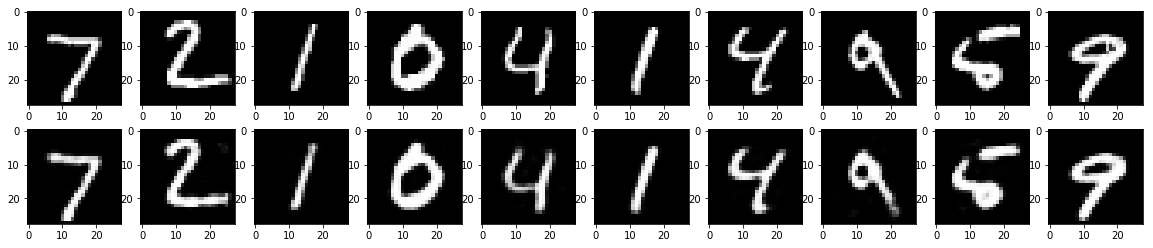

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
n = 10
for i in range(n):    
    plt.subplot(2, n, i + 1)
    img = x_test_1D[i].reshape(28,28)
    plt.imshow(img)
    
    plt.subplot(2, n, i + 1 + n)
    img = decoded_imgs[i].reshape(28,28)
    plt.imshow(img)
plt.gray()